# Task 1

As somebody who is interested in the car industry, I stumbled upon a dataset that shows car purchase decisions. The dataset comes with some of the crucial factors including the customers' gender, age, and annual income.

This is an ideal choice for working with linear regression since this is a classification problem. The output of the problem is only one of the two: purchased or didn't purchase. 


# Task 2

In [163]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import Normalizer
import time
import warnings
warnings.filterwarnings("ignore")

In [164]:
# upload and read the file
# source: https://www.kaggle.com/datasets/gabrielsantello/cars-purchase-decision-dataset?resource=download
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('drive/MyDrive/datasets/car_data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [165]:
# Detects missing values
df.isna().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

In [166]:
# Describes the statistics of the numerical data
df.describe()

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


In [167]:
# Check if this is a balanced data
df.Purchased.value_counts(normalize=True)

0    0.598
1    0.402
Name: Purchased, dtype: float64

This is balanced data

Text(0, 0.5, 'AnnualSalary')

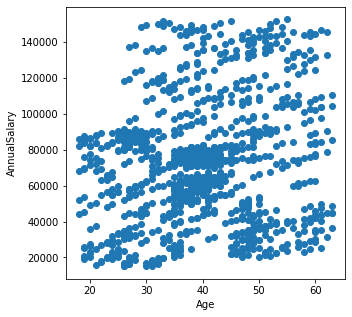

In [168]:
# Using scatter plot to identify the relationship of age and annual salary
ig, ax = plt.subplots(figsize=(5,5))
ax.scatter(df.Age, df.AnnualSalary)
ax.set_xlabel('Age')
ax.set_ylabel('AnnualSalary')

According to the scatterplot, there is no strong correlation between the age and salary of buyers. The dataset provides well-distributed samples.

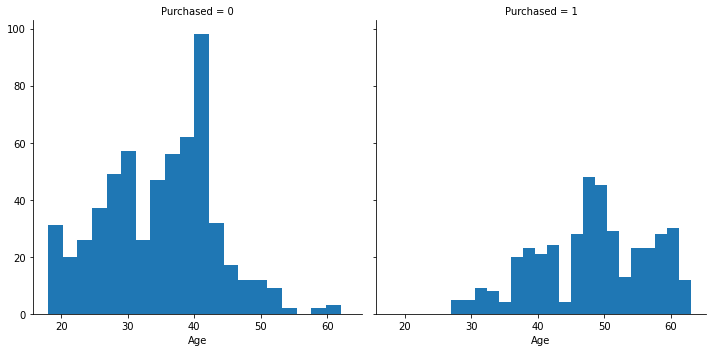

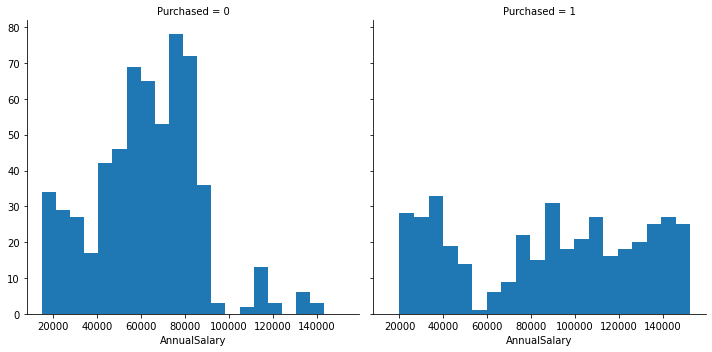

In [169]:
g = sns.FacetGrid(df, col='Purchased', height=5)
g.map(plt.hist, 'Age', bins=20)
g = sns.FacetGrid(df, col='Purchased', height=5)
g.map(plt.hist, 'AnnualSalary', bins=20)

Overall, people who are older are more likely to make a purchase decision.

In [170]:
# Convert all sex labels to numerical values
df.Gender = df.Gender.map({ 'Male': 0, 'Female': 1 })

# Task 3

In [201]:
# Defines the sigmoid function
def sigmoid(x):
  return 1/(1 + np.exp(-x))

In [202]:
# The batch algorithm
def batch(data, learning_rate, itr):
  start = time.time()

  # Data partitioning
  X = data.drop(['Purchased'], axis=1)
  y = data.Purchased
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  
  transformer = Normalizer(norm='max').fit(X_train)
  X_train = transformer.transform(X_train)
  X_test = transformer.transform(X_test)

  # Generates initial values
  m, n = X_train.shape
  w = np.random.random(size=n)
  b = np.random.random()

  for i in range(itr):
    A = sigmoid(np.dot(w, X_train.T) + b)
    # cost = -1/n * np.sum(y * np.log(A) + (1-y) * (np.log(1-A)))
    dw = np.dot(X_train.T, (A-y_train).T)/m
    db = np.sum(A-y_train)/m
    w = w - learning_rate * dw
    b = b - learning_rate * db
  end = time.time()
  print('Time spent: '+str(end-start))
  return((np.round(sigmoid(np.dot(w, X_test.T) + b)) == y_test).mean())


In [203]:
from sklearn.utils import shuffle
# The mini-batch algorithm
def mini_batch(data, learning_rate, itr):
  start = time.time()

  # Data partitioning
  data_train, data_test = train_test_split(data, test_size=0.2)

  X_test = data_test.drop(['Purchased'], axis=1)
  y_test = data_test.Purchased

  # Generates initial values
  m, n = data_train.shape
  n -= 1
  w = np.random.random(size=n)
  b = np.random.random()

  batch_size = 50

  for i in range(itr):
    # Shuffles training data for every iteration
    data_train = shuffle(data_train)
    X_train = data_train.drop(['Purchased'], axis=1)
    y_train = data_train.Purchased

    checked = 0
    while checked < m:
      # Selects a portion of the training data
      batch_tmp = min(batch_size, m - checked)
      X_batch = X_train[checked:checked + batch_tmp]
      y_batch = y_train[checked:checked + batch_tmp]
      checked += batch_tmp
      
      A = sigmoid(np.dot(w, X_batch.T) + b)
      # cost = -1/n * np.sum(y * np.log(A) + (1-y) * (np.log(1-A)))
      dw = np.dot(X_batch.T, (A-y_batch).T)/m
      db = np.sum(A-y_batch)/m
      w = w - learning_rate * dw
      b = b - learning_rate * db

  end = time.time()
  print('Time spent: '+str(end-start))
  return((np.round(sigmoid(np.dot(w, X_test.T) + b)) == y_test).mean())

In [214]:
(batch(df.copy(), 0.1, 100))

Time spent: 0.04901266098022461


0.61

In [215]:
(mini_batch(df.copy(), 0.01, 100))

Time spent: 1.6360363960266113


0.625

# Task 4

In [195]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X = df.drop(['Purchased'], axis=1)
y = df.Purchased
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
transformer = Normalizer(norm='max').fit(X_train)
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

# Uses sklearn's default solver lbfgs as optimization
start = time.time()
clf = LogisticRegression(class_weight='balanced', random_state=0).fit(X_train, y_train)
y_pred_clf = clf.predict(X_test)
print(accuracy_score(y_test, y_pred_clf))
end = time.time()
print('Time spent: '+str(end-start))

0.505
Time spent: 0.004178762435913086


In [200]:
# Uses sklearn's solver newton-cg as optimization
start = time.time()
clf = LogisticRegression(class_weight='balanced', random_state=0, solver='liblinear').fit(X_train, y_train)
y_pred_clf = clf.predict(X_test)
print(accuracy_score(y_test, y_pred_clf))
end = time.time()
print('Time spent: '+str(end-start))

0.505
Time spent: 0.013037443161010742


By Comparison, the unoptimized versions implemented in task 3 are much slower. Between batch and mini-batch, mini-batch takes a lot more time, and has a slight increse in accuracy. Between the two versions of solvers from sklearn, lbfgs takes the least amount of time, and the two has similar accuracy.  